### CUSTOMER CHURN PREDICTION

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("data/Churn_Modelling.csv")

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
del df["RowNumber"]
del df["CustomerId"]

In [14]:
df.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
35,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
5619,Kao,785,Spain,Male,41,7,0.00,2,1,1,199108.88,0
666,Wallace,559,France,Female,31,3,127070.73,1,0,1,160941.78,0
5372,Vinogradova,598,Spain,Female,39,5,0.00,2,1,1,83103.46,0
4564,Grant,650,Germany,Male,23,4,93911.30,2,1,0,69055.45,0


### EDA

In [16]:
# active 
df[(df.Gender == "Female") & (df.Exited == 0)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
12,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,Azikiwe,637,France,Female,33,7,103377.81,1,1,0,84419.78,0
9977,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0
9979,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9994,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0


In [17]:
import seaborn as sns

In [18]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()

In [19]:
df["Geography_"] = lb.fit_transform(df.Geography)


In [20]:
df.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [21]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.007888
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.022812
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003739
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.069408
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.003972
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.008523
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.006724
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.001369
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.035943
Geography_,0.007888,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,1.000000


## postive 
- balance
- age
- EstimatedSalary

<Axes: >

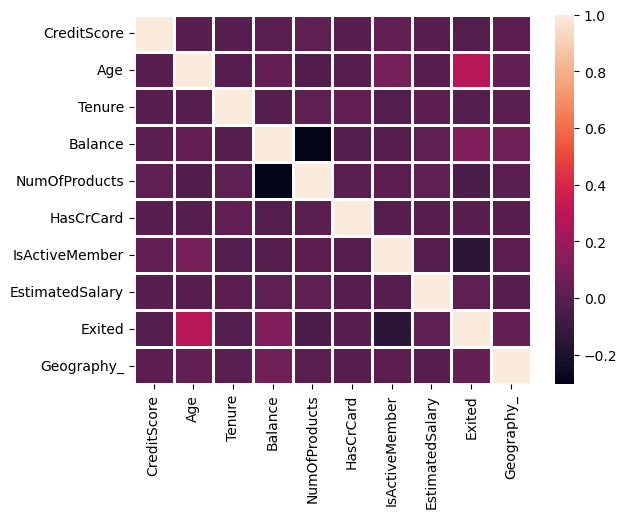

In [23]:
sns.heatmap(df.corr(),linewidths=1)

In [24]:
df['Age Group'] = pd.cut(df.Age, bins=[0, 20, 30, 40,50, 60, 70,  np.inf], labels=["0-20", "21-30","31-40" ,"41-50", "51-60", "61-70", "70+"])
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_,Age Group
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,41-50
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,41-50
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,41-50
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,31-40
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,31-40
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,31-40
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,31-40
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,41-50


In [25]:
import matplotlib.pyplot as plt

# Categorical Data

<Axes: xlabel='Exited', ylabel='count'>

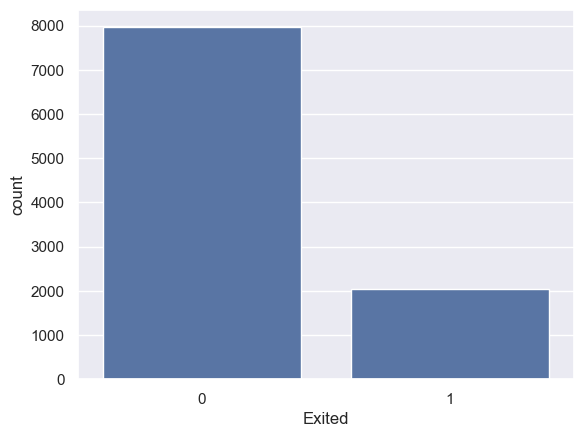

In [27]:
sns.set_theme(style='darkgrid')
sns.countplot(df,x=df.Exited)

<Axes: xlabel='Geography', ylabel='count'>

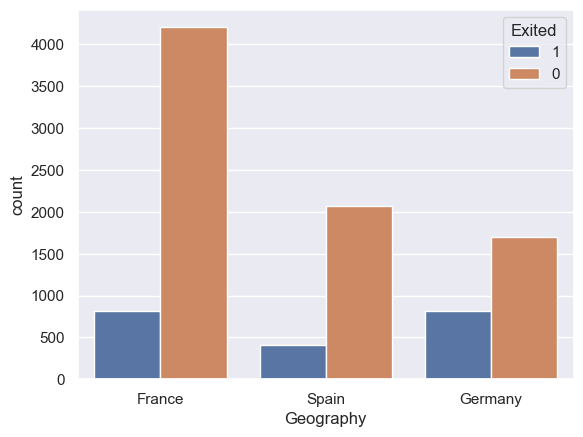

In [28]:
sns.countplot(df,x=df.Geography,hue=df.Exited.astype(str))

<Axes: xlabel='Gender', ylabel='count'>

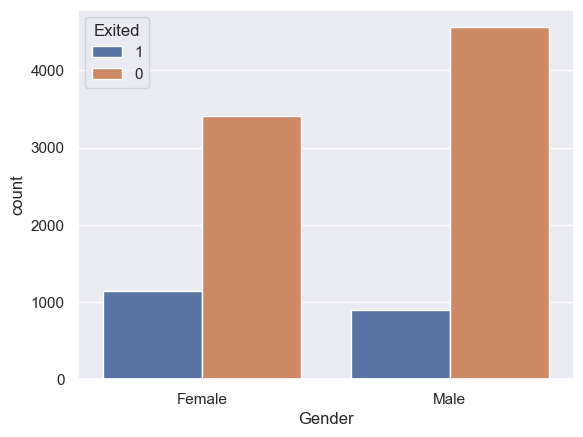

In [29]:
sns.countplot(df,x=df.Gender,hue=df.Exited.astype(str))

## Numerical Data

<Axes: xlabel='Age', ylabel='Count'>

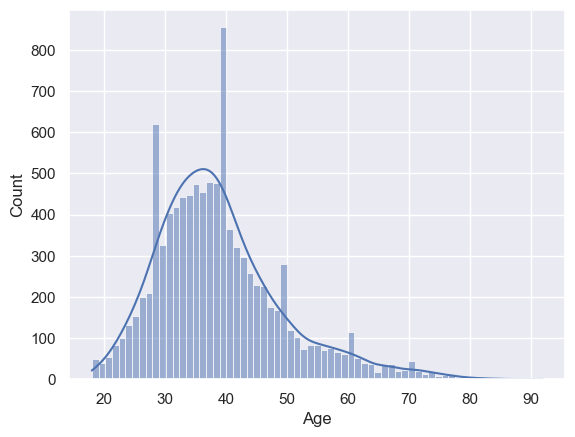

In [31]:

sns.histplot(df.Age,kde=True)

<Axes: xlabel='CreditScore', ylabel='Count'>

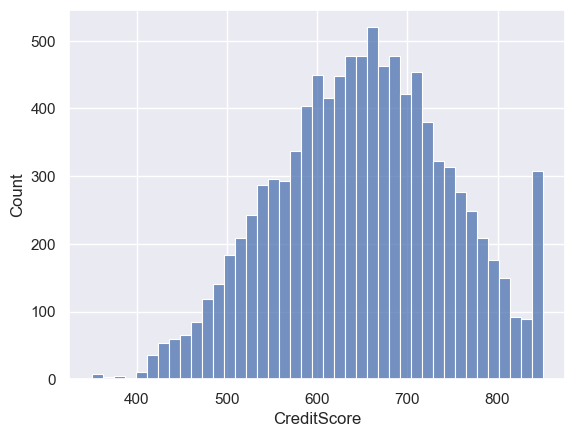

In [32]:
sns.histplot(df.CreditScore)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

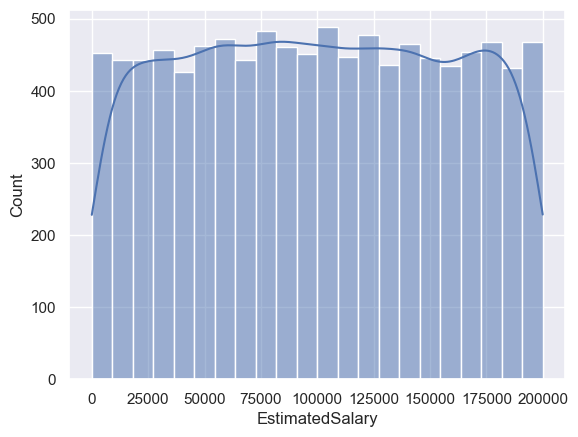

In [33]:
sns.histplot(df.EstimatedSalary,kde=True)

<Axes: ylabel='EstimatedSalary'>

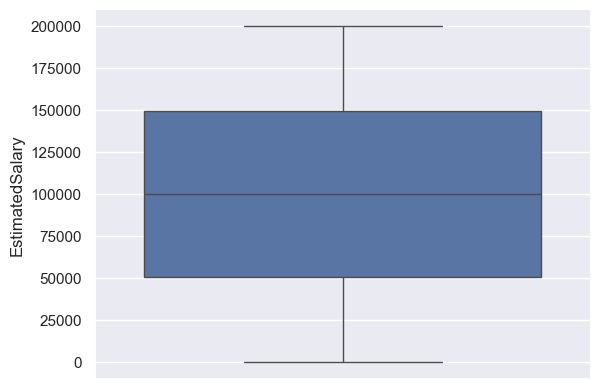

In [34]:
sns.boxplot(df.EstimatedSalary)

<Axes: ylabel='Age'>

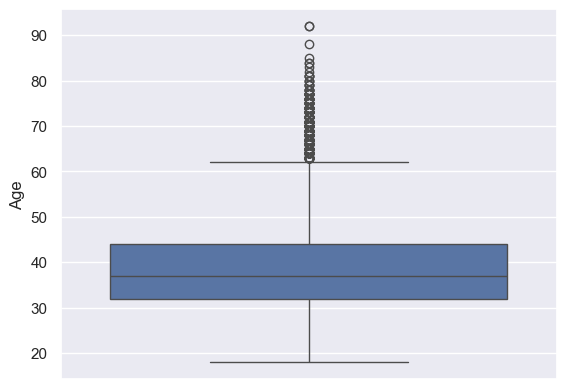

In [35]:
sns.boxplot(df.Age)

In [36]:
df.Age.min(),df.Age.max(),df.Age.mean()

(18, 92, 38.9218)

In [37]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_', 'Age Group'],
      dtype='object')

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

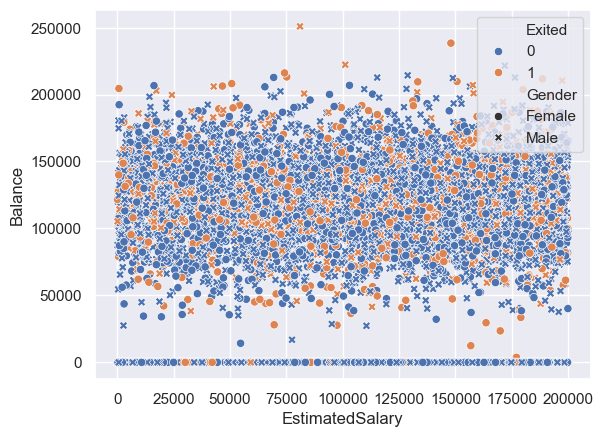

In [38]:

sns.scatterplot(x=df.EstimatedSalary,y=df.Balance,hue=df.Exited,style=df.Gender)

<Axes: xlabel='Gender', ylabel='Age'>

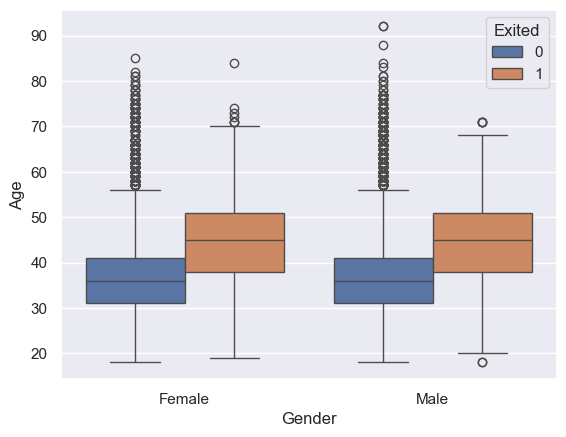

In [39]:
sns.boxplot(df,x= df.Gender,y=df.Age,hue=df.Exited)

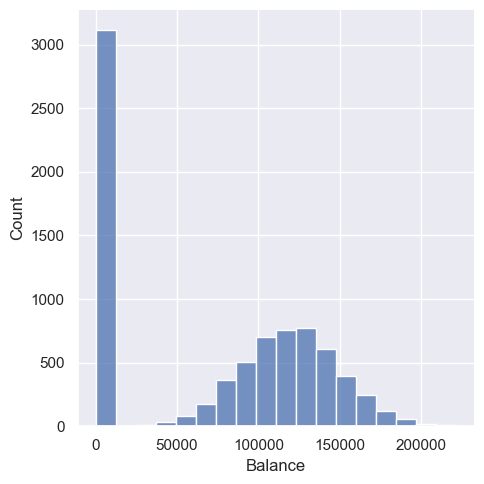

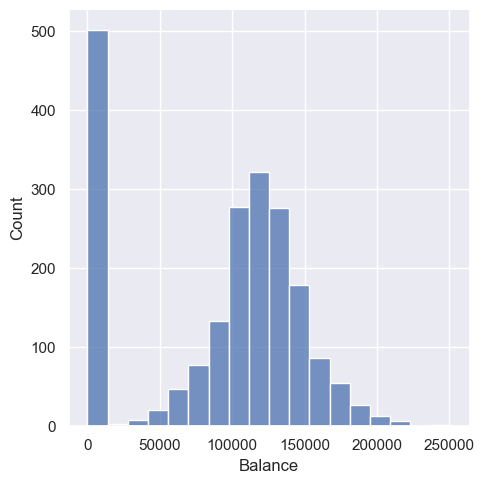

In [40]:
sns.displot(df[df.Exited == 0]["Balance"])
sns.displot(df[df.Exited == 1]["Balance"])

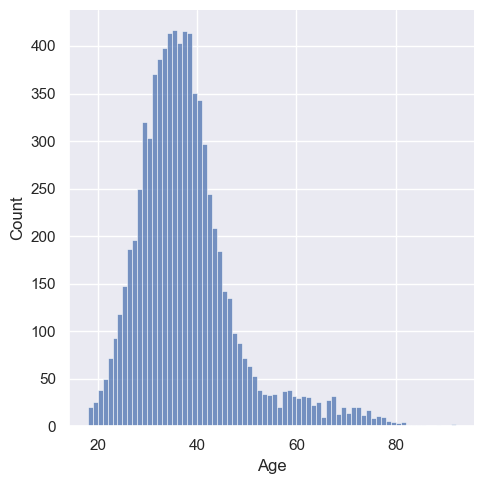

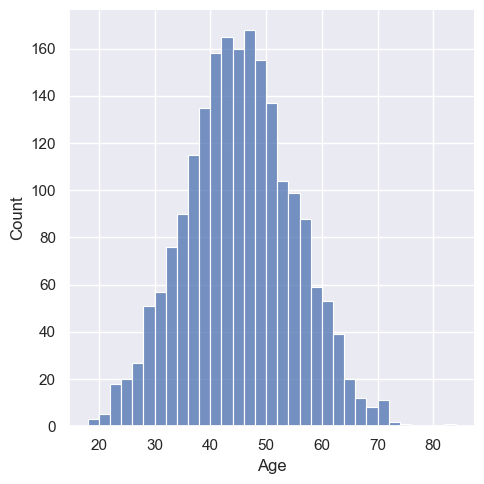

In [41]:
sns.displot(df[df.Exited == 0]["Age"])
sns.displot(df[df.Exited == 1]["Age"])

<Axes: xlabel='Exited', ylabel='Gender'>

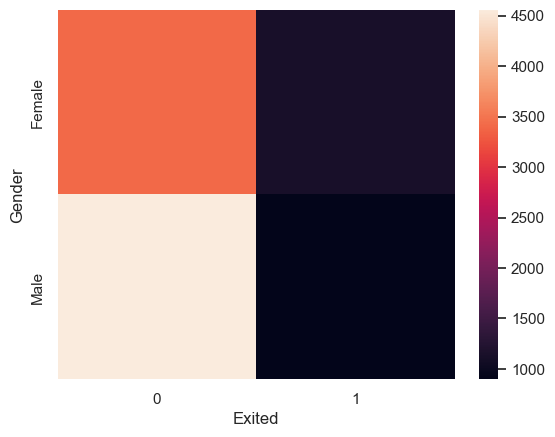

In [42]:
sns.heatmap(pd.crosstab(df.Gender,df.Exited))

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  object  
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  object  
 3   Gender           10000 non-null  object  
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int64   
 9   IsActiveMember   10000 non-null  int64   
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
 12  Geography_       10000 non-null  int32   
 13  Age Group        10000 non-null  category
dtypes: category(1), float64(2), int32(1), int64(7), object(3)
memory usage: 986.8+ KB


In [46]:
x = df[["Age","Balance","EstimatedSalary","Geography_"]]
y = df.Exited 

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=12)

In [48]:
x_train

,Age,Balance,EstimatedSalary,Geography_
5951,41,0.00,61018.85,0
6630,36,0.00,89804.83,0
3240,50,125647.36,57541.08,0
5942,53,109172.88,54676.10,1
3789,45,89122.30,199256.98,2
...,...,...,...,...
3714,34,105057.33,9217.92,0
7409,42,105356.09,130489.37,1
3325,32,0.00,44099.75,0
9606,44,118569.03,82117.20,0


In [49]:
y_train

5951    0
6630    0
3240    1
5942    1
3789    0
       ..
3714    0
7409    0
3325    0
9606    0
5787    0
Name: Exited, Length: 8000, dtype: int64

In [50]:
from sklearn.tree import DecisionTreeClassifier


In [51]:
clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=42, max_depth=5, min_samples_leaf=10)

    # Performing training
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [52]:
y_pred = clf_gini.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [53]:
accuracy_score(y_test,y_pred)

0.797

In [54]:
precision_score(y_test,y_pred)

0.6071428571428571

In [55]:
pd.Series(y_pred).value_counts()

0    1860
1     140
dtype: int64

In [56]:
clf_gini.predict([[0	,125889.30	,9601.50		,0]])

array([0], dtype=int64)

In [57]:
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [60]:
y_pred2 = knn.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred2)

0.7795

In [62]:
precision_score(y_test,y_pred2)

0.3333333333333333

In [64]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [65]:
rf =RandomForestClassifier(max_depth= 8, max_features= 0.6, max_samples= 0.5)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.6, max_samples=0.5)

In [67]:
y_pred3 = rf.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred3)

0.812

In [69]:
precision_score(y_test,y_pred3)

0.6948051948051948

In [71]:
sv = SVC()
gbc = GradientBoostingClassifier()

In [72]:
sv.fit(x_train,y_train),gbc.fit(x_train,y_train)

(SVC(), GradientBoostingClassifier())

In [73]:
accuracy_score(y_test, sv.predict(x_test))

0.782

In [74]:
accuracy_score(y_test, gbc.predict(x_test))

0.8115

In [75]:
precision_score(y_test, gbc.predict(x_test))

0.6705202312138728

# GridSearchCv

In [77]:

n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1]
max_depth = [2,8,None]
max_sample = [0.5,0.75,1]

In [78]:
param_grid = {"n_estimators":n_estimators,
              "max_features":max_features,  
              "max_depth":max_depth,
              "max_samples":max_sample}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,cv = 5,
                       verbose=2,
                       n_jobs=-1)

In [81]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=0.6,
                                              max_samples=0.5),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1],
                         'max_samples': [0.5, 0.75, 1],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [82]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 120}

In [90]:
rf_grid.best_score_

0.820375

In [103]:
rf.predict([[0	,125889.30	,9601.50		,0	]])

array([0], dtype=int64)

In [105]:
knn.predict([[0	,125889.30	,9601.50		,0	]])

array([0], dtype=int64)